In [9]:
import pandas as pd

# Load dataset
df = pd.read_csv(r"C:\Users\Pal\Desktop\BMW sales data (2010-2024).csv")

# Check basic info
print(df.info())
print(df.isnull().sum())  # missing values

# Drop duplicates
df = df.drop_duplicates()

# Handle missing values
df['Price_USD'] = df['Price_USD'].fillna(df['Price_USD'].median())  # numeric
df['Region'] = df['Region'].fillna('Unknown')  # categorical


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Model                 50000 non-null  object 
 1   Year                  50000 non-null  int64  
 2   Region                50000 non-null  object 
 3   Color                 50000 non-null  object 
 4   Fuel_Type             50000 non-null  object 
 5   Transmission          50000 non-null  object 
 6   Engine_Size_L         50000 non-null  float64
 7   Mileage_KM            50000 non-null  int64  
 8   Price_USD             50000 non-null  int64  
 9   Sales_Volume          50000 non-null  int64  
 10  Sales_Classification  50000 non-null  object 
dtypes: float64(1), int64(4), object(6)
memory usage: 4.2+ MB
None
Model                   0
Year                    0
Region                  0
Color                   0
Fuel_Type               0
Transmission            0
Engin

In [10]:
# Example: Create new features
df['Total_Revenue_of_Each_Model'] = df['Price_USD'] * (df['Sales_Volume'])

# Encoding categorical variables
df = pd.get_dummies(df, columns=['Sales_Classification'], drop_first=False)

# Binning continuous variable
df['Price_Bin'] = pd.cut(df['Price_USD'], bins=[0,60000,80000,100000,115000], 
                         labels=['Low','Medium','High','Luxury'])

In [15]:
from scipy import stats

# Example: t-test (compare price between 2 regions)
region1 = df[df['Region'] == 'Europe']['Price_USD']
region2 = df[df['Region'] == 'Asia']['Price_USD']

t_stat, p_val = stats.ttest_ind(region1, region2, equal_var=False)
print(f"T-statistic: {t_stat}, P-value: {p_val}")

# Example: Chi-square test (categorical association)
contingency = pd.crosstab(df['Price_Bin'], df['Region'])
chi2, p, dof, expected = stats.chi2_contingency(contingency)
print(f"Chi2: {chi2}, P-value: {p}")


T-statistic: -1.4138627995643476, P-value: 0.1574207396109344
Chi2: 10.605560429149438, P-value: 0.7800216114780725


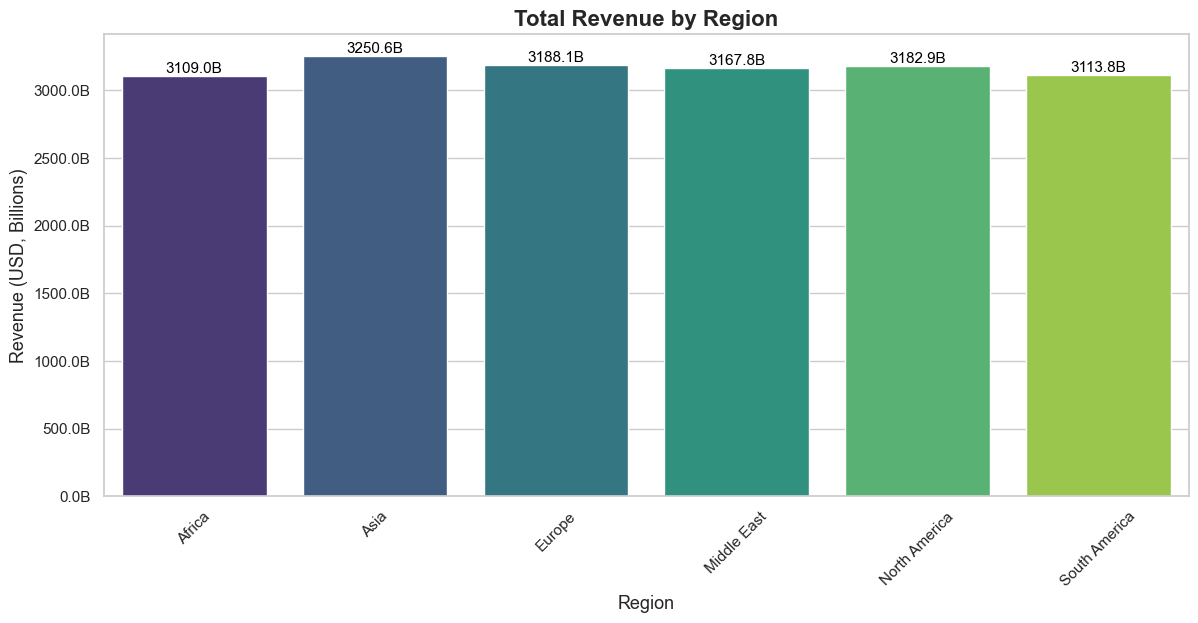

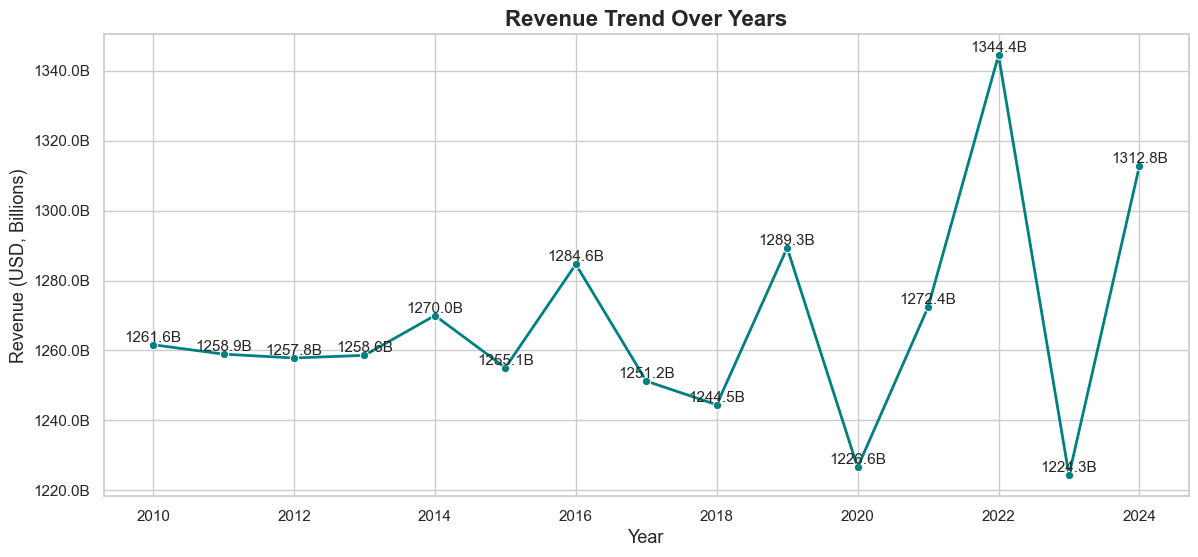

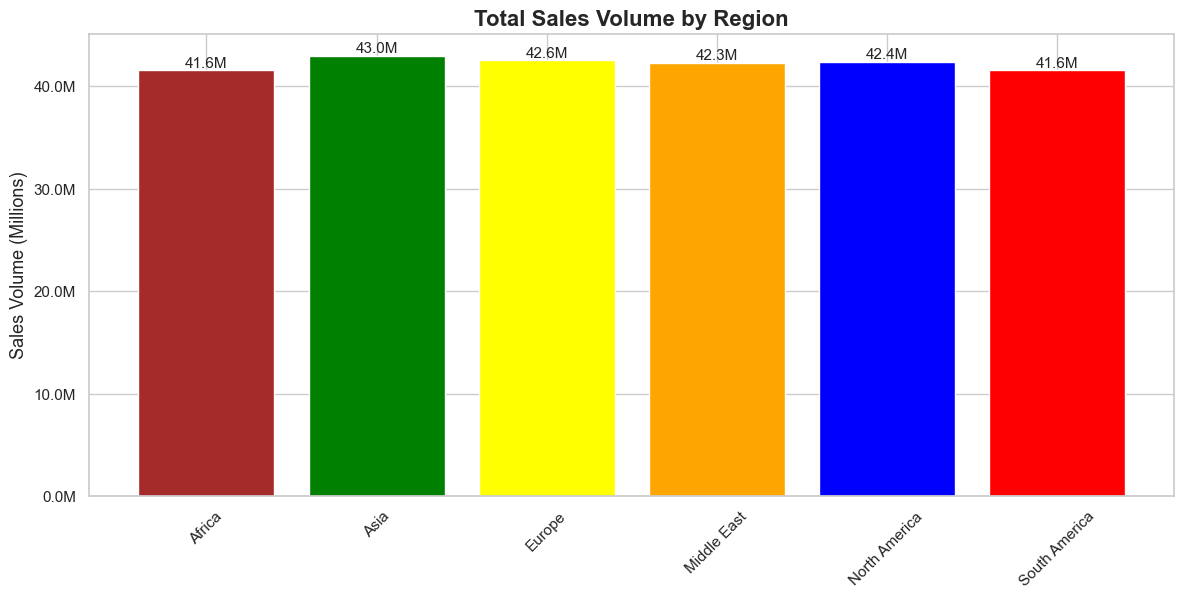

C:\Users\Pal\AppData\Local\Temp\ipykernel_20280\1996643430.py:88: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x="Price_Bin", data=df,


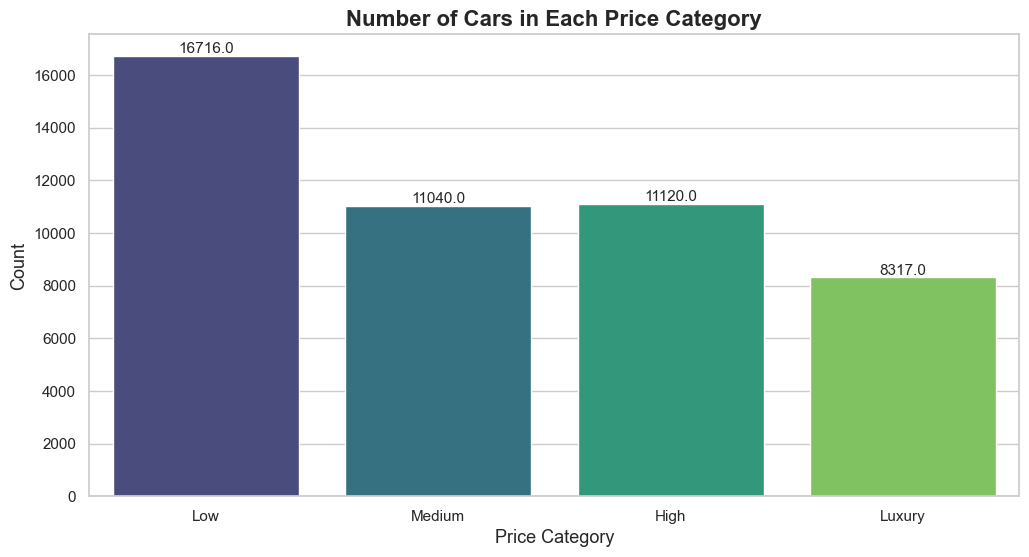

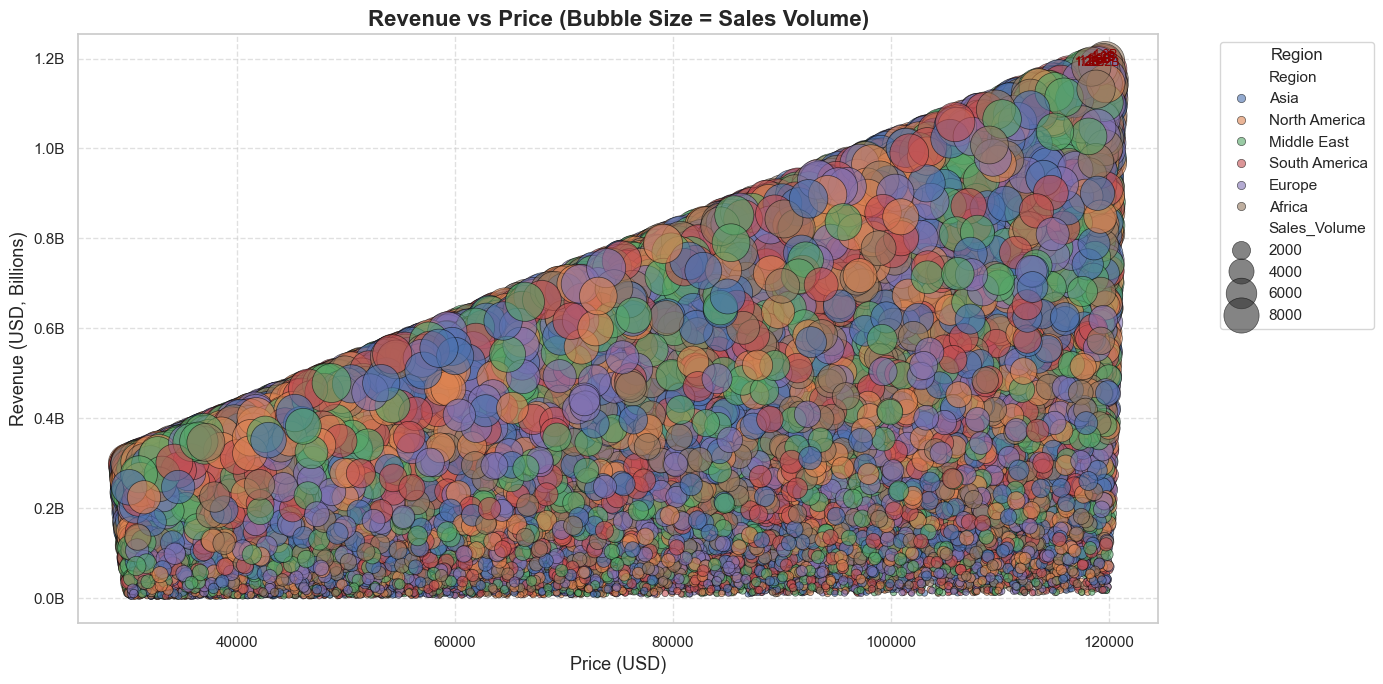

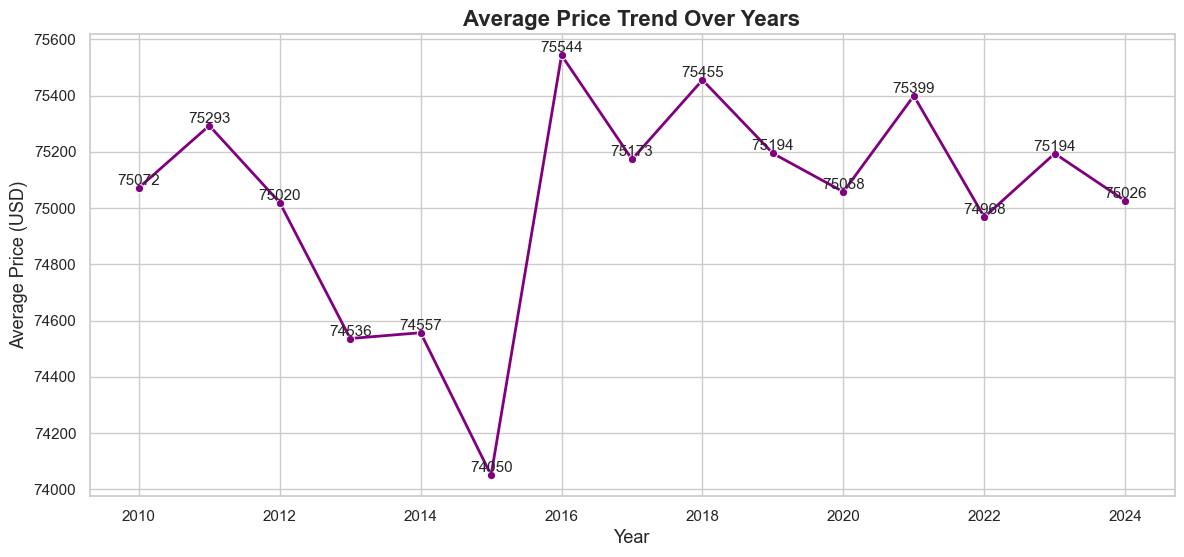

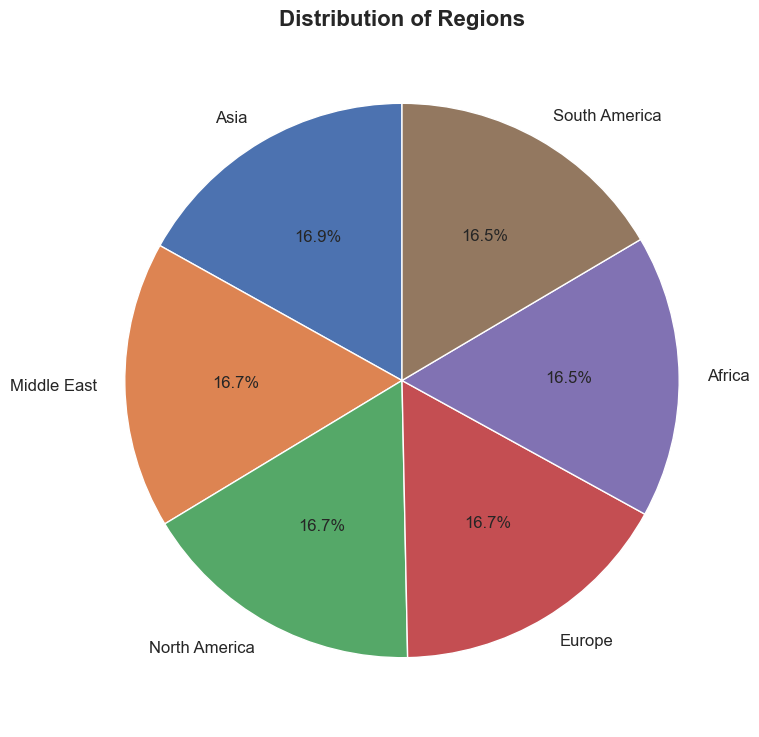

C:\Users\Pal\AppData\Local\Temp\ipykernel_20280\1996643430.py:176: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="Region", y="Price_USD",


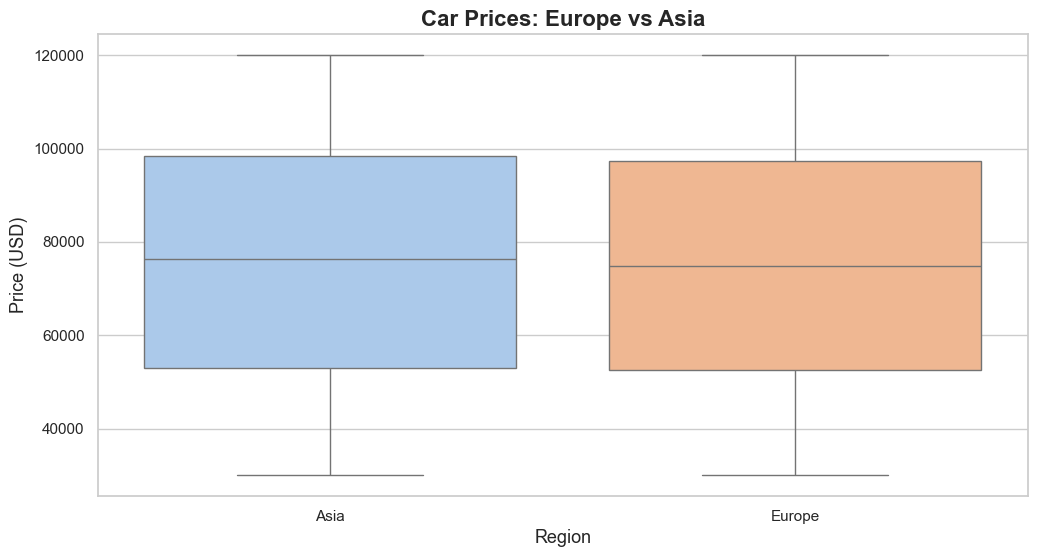

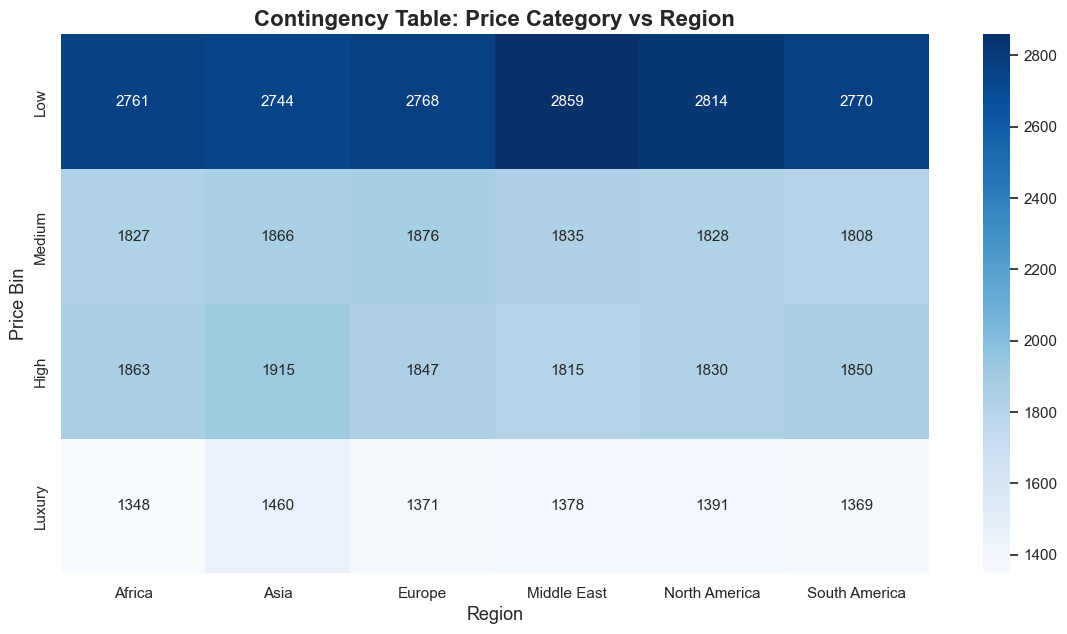

In [22]:
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.ticker as mticker

# Global style settings
sns.set_theme(style="whitegrid")
plt.rcParams.update({
    "axes.titlesize": 16,
    "axes.titleweight": "bold",
    "axes.labelsize": 13,
    "xtick.labelsize": 11,
    "ytick.labelsize": 11
})

# =====================================================
# 1. Bar Chart – Total Revenue by Region
# =====================================================
revenue_by_region = df.groupby("Region")["Total_Revenue_of_Each_Model"].sum().reset_index()

plt.figure(figsize=(14,6))
ax = sns.barplot(
    x="Region",
    y="Total_Revenue_of_Each_Model",
    hue="Region",
    data=revenue_by_region,
    palette="viridis",
    legend=False
)
plt.title("Total Revenue by Region")
plt.xticks(rotation=45)
plt.ylabel("Revenue (USD, Billions)")

ax.yaxis.set_major_formatter(mticker.FuncFormatter(lambda x, _: f"{x/1e9:.1f}B"))

for p in ax.patches:
    ax.annotate(f"{p.get_height()/1e9:.1f}B",
                (p.get_x() + p.get_width()/2., p.get_height()),
                ha="center", va="bottom", fontsize=11, color="black")
plt.show()


# =====================================================
# 2. Line Chart – Revenue Trend Over Years
# =====================================================
revenue_by_year = df.groupby("Year")["Total_Revenue_of_Each_Model"].sum().reset_index()

plt.figure(figsize=(14,6))
ax = sns.lineplot(x="Year", y="Total_Revenue_of_Each_Model",
                  data=revenue_by_year, marker="o", linewidth=2, color="teal")
plt.title("Revenue Trend Over Years")
plt.ylabel("Revenue (USD, Billions)")

ax.yaxis.set_major_formatter(mticker.FuncFormatter(lambda x, _: f"{x/1e9:.1f}B"))

for i, row in revenue_by_year.iterrows():
    plt.text(row["Year"], row["Total_Revenue_of_Each_Model"],
             f"{row['Total_Revenue_of_Each_Model']/1e9:.1f}B",
             ha="center", va="bottom", fontsize=11)
plt.show()


# =====================================================
# 3. Bar Chart – Total Sales Volume by Region
# =====================================================
region_sales = df.groupby("Region")["Sales_Volume"].sum().reset_index()
custom_colors = ["brown", "green", "yellow", "orange", "blue", "red"]

plt.figure(figsize=(14,6))
bars = plt.bar(region_sales["Region"], region_sales["Sales_Volume"],
               color=custom_colors[:len(region_sales)])
plt.title("Total Sales Volume by Region")
plt.xticks(rotation=45)
plt.ylabel("Sales Volume (Millions)")

plt.gca().yaxis.set_major_formatter(mticker.FuncFormatter(lambda x, _: f"{x/1e6:.1f}M"))

for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, height,
             f"{height/1e6:.1f}M", ha="center", va="bottom", fontsize=11)
plt.show()


# =====================================================
# 4. Bar Chart – Number of Cars per Price Category
# =====================================================
plt.figure(figsize=(12,6))
ax = sns.countplot(x="Price_Bin", data=df,
                   order=["Low","Medium","High","Luxury"],
                   palette="viridis")
plt.title("Number of Cars in Each Price Category")
plt.xlabel("Price Category")
plt.ylabel("Count")

for p in ax.patches:
    ax.annotate(f"{p.get_height()}",
                (p.get_x() + p.get_width()/2., p.get_height()),
                ha="center", va="bottom", fontsize=11)
plt.show()


# =====================================================
# 5. Scatter Plot – Price vs. Revenue
# =====================================================
plt.figure(figsize=(14,7))

# Scale bubble sizes (divide by larger factor for readability)
bubble_size = df["Sales_Volume"] / 50000  

# Scatter with region color
sns.scatterplot(
    x="Price_USD",
    y="Total_Revenue_of_Each_Model",
    size="Sales_Volume",
    hue="Region",
    sizes=(20, 800),
    alpha=0.6,
    edgecolor="black",
    linewidth=0.5,
    data=df
)

plt.title("Revenue vs Price (Bubble Size = Sales Volume)", fontsize=16, weight="bold")
plt.xlabel("Price (USD)")
plt.ylabel("Revenue (USD, Billions)")

# Format y-axis in billions
plt.gca().yaxis.set_major_formatter(mticker.FuncFormatter(lambda x, _: f"{x/1e9:.1f}B"))

# Annotate top 10 biggest revenue models
top_points = df.nlargest(10, "Total_Revenue_of_Each_Model")
for _, row in top_points.iterrows():
    plt.text(row["Price_USD"], row["Total_Revenue_of_Each_Model"],
             f"{row['Total_Revenue_of_Each_Model']/1e9:.1f}B",
             ha="center", va="bottom", fontsize=9, color="darkred")

plt.legend(title="Region", bbox_to_anchor=(1.05, 1), loc="upper left")
plt.grid(True, linestyle="--", alpha=0.6)
plt.tight_layout()
plt.show()

# =====================================================
# 6. Line Graph – Average Price Trend by Year
# =====================================================
price_by_year = df.groupby("Year")["Price_USD"].mean().reset_index()

plt.figure(figsize=(14,6))
ax = sns.lineplot(x="Year", y="Price_USD",
                  data=price_by_year, marker="o", linewidth=2, color="purple")
plt.title("Average Price Trend Over Years")
plt.ylabel("Average Price (USD)")

for i, row in price_by_year.iterrows():
    plt.text(row["Year"], row["Price_USD"],
             f"{row['Price_USD']:.0f}",
             ha="center", va="bottom", fontsize=11)
plt.show()


# =====================================================
# 7. Pie Chart – Distribution of Regions
# =====================================================
region_counts = df["Region"].value_counts()

plt.figure(figsize=(9,9))
plt.pie(region_counts, labels=region_counts.index,
        autopct="%1.1f%%", startangle=90, textprops={"fontsize":12})
plt.title("Distribution of Regions")
plt.show()


# =====================================================
# 8. Boxplot – Compare Price Distributions (Europe vs Asia)
# =====================================================
plt.figure(figsize=(12,6))
sns.boxplot(x="Region", y="Price_USD",
            data=df[df["Region"].isin(["Europe","Asia"])],
            palette="pastel")
plt.title("Car Prices: Europe vs Asia")
plt.ylabel("Price (USD)")
plt.show()


# =====================================================
# 9. Heatmap – Contingency Table (Price Bin vs Region)
# =====================================================
contingency = pd.crosstab(df['Price_Bin'], df['Region'])

plt.figure(figsize=(14,7))
sns.heatmap(contingency, annot=True, fmt="d", cmap="Blues",
            annot_kws={"size":11})
plt.title("Contingency Table: Price Category vs Region")
plt.ylabel("Price Bin")
plt.xlabel("Region")
plt.show()

In [19]:
import pandas as pd
from IPython.display import display

display(df)
pd.set_option("display.max_rows", 100)   # adjust number of rows
pd.set_option("display.max_columns", None)  # show all columns
display(df)


,Model,Year,Region,Color,Fuel_Type,Transmission,Engine_Size_L,Mileage_KM,Price_USD,Sales_Volume,Total_Revenue_of_Each_Model,Sales_Classification_High,Sales_Classification_Low,Price_Bin
0,5 Series,2016,Asia,Red,Petrol,Manual,3.5,151748,98740,8300,819542000,True,False,High
1,i8,2013,North America,Red,Hybrid,Automatic,1.6,121671,79219,3428,271562732,False,True,Medium
2,5 Series,2022,North America,Blue,Petrol,Automatic,4.5,10991,113265,6994,792175410,False,True,Luxury
3,X3,2024,Middle East,Blue,Petrol,Automatic,1.7,27255,60971,4047,246749637,False,True,Medium
4,7 Series,2020,South America,Black,Diesel,Manual,2.1,122131,49898,3080,153685840,False,True,Low
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,i3,2014,Asia,Red,Hybrid,Manual,4.6,151030,42932,8182,351269624,True,False,Low
49996,i3,2023,Middle East,Silver,Electric,Manual,4.2,147396,48714,9816,478176624,True,False,Low
49997,5 Series,2010,Middle East,Red,Petrol,Automatic,4.5,174939,46126,8280,381923280,True,False,Low
49998,i3,2020,Asia,White,Electric,Automatic,3.8,3379,58566,9486,555557076,True,False,Low


,Model,Year,Region,Color,Fuel_Type,Transmission,Engine_Size_L,Mileage_KM,Price_USD,Sales_Volume,Total_Revenue_of_Each_Model,Sales_Classification_High,Sales_Classification_Low,Price_Bin
0,5 Series,2016,Asia,Red,Petrol,Manual,3.5,151748,98740,8300,819542000,True,False,High
1,i8,2013,North America,Red,Hybrid,Automatic,1.6,121671,79219,3428,271562732,False,True,Medium
2,5 Series,2022,North America,Blue,Petrol,Automatic,4.5,10991,113265,6994,792175410,False,True,Luxury
3,X3,2024,Middle East,Blue,Petrol,Automatic,1.7,27255,60971,4047,246749637,False,True,Medium
4,7 Series,2020,South America,Black,Diesel,Manual,2.1,122131,49898,3080,153685840,False,True,Low
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,i3,2014,Asia,Red,Hybrid,Manual,4.6,151030,42932,8182,351269624,True,False,Low
49996,i3,2023,Middle East,Silver,Electric,Manual,4.2,147396,48714,9816,478176624,True,False,Low
49997,5 Series,2010,Middle East,Red,Petrol,Automatic,4.5,174939,46126,8280,381923280,True,False,Low
49998,i3,2020,Asia,White,Electric,Automatic,3.8,3379,58566,9486,555557076,True,False,Low
